In [33]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report

In [34]:
df = pd.read_csv("/content/Churn_Modelling.csv")
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9688,9689,15730579,Ward,850,France,Male,68,5,169445.40,1,1,1,186335.07,0
1909,1910,15773605,Iadanza,670,Spain,Female,32,3,0.00,2,1,0,46175.70,0
1528,1529,15597131,Fu,415,France,Male,32,5,145807.59,1,1,1,3064.65,0
9426,9427,15675518,Charlton,499,Spain,Female,53,1,75225.53,2,0,0,144849.10,1
3161,3162,15767681,Smalley,470,Spain,Male,34,9,0.00,2,0,1,89013.67,0


In [35]:
df.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


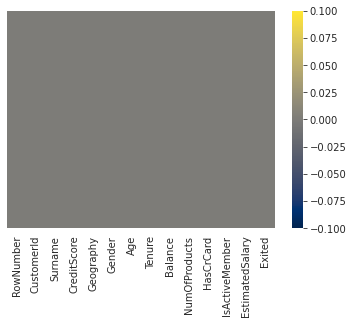

In [36]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='cividis')

In [37]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [38]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


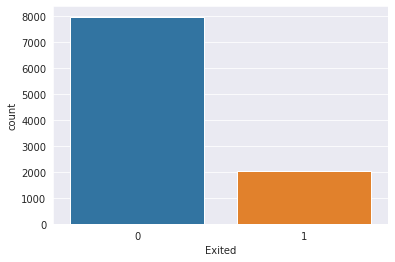

In [39]:
sns.set_style('darkgrid')
sns.countplot(x="Exited", data=df)

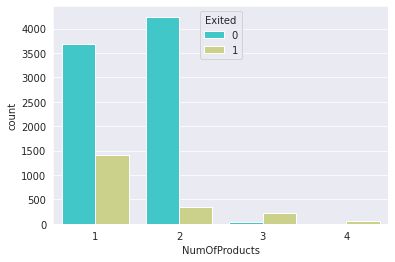

In [40]:
sns.set_style('darkgrid')
sns.countplot(x='NumOfProducts',hue='Exited',data=df,palette='rainbow')

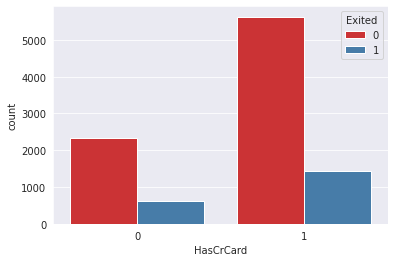

In [41]:
sns.set_style('darkgrid')
sns.countplot(x='HasCrCard',hue='Exited',data=df,palette='Set1')

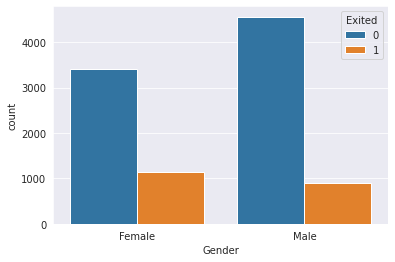

In [42]:
sns.set_style('darkgrid')
sns.countplot(x='Gender',hue='Exited',data=df)

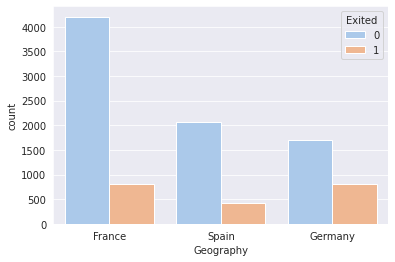

In [43]:
sns.set_style('darkgrid')
sns.countplot(x='Geography',hue='Exited',data=df,palette='pastel')

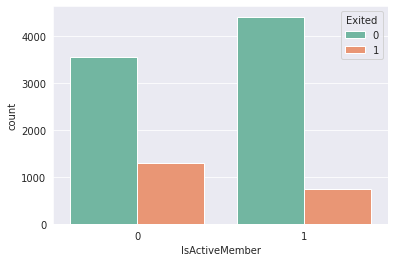

In [44]:
sns.set_style('darkgrid')
sns.countplot(x='IsActiveMember',hue='Exited',data=df,palette='Set2')

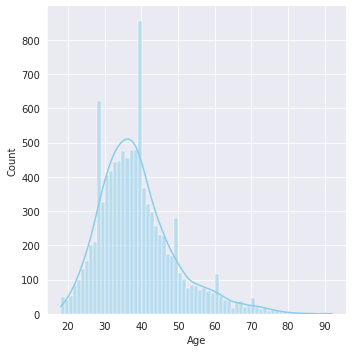

In [45]:
sns.displot(df['Age'].dropna(),kde=True,color='skyblue')

In [46]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [47]:
df['Gender'].replace({'Female':0,'Male':1},inplace=True)

In [48]:
df.Gender.unique()

array([0, 1])

In [49]:
df1 = pd.get_dummies(data=df,columns=['Geography'])
df1.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Geography_France', 'Geography_Germany',
       'Geography_Spain'],
      dtype='object')

In [50]:
cols_to_scale=['CreditScore','Age','Balance','EstimatedSalary','Tenure','NumOfProducts']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [51]:
df1

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,2,15647311,Hill,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,3,15619304,Onio,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,4,15701354,Boni,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,5,15737888,Mitchell,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,0.842,1,0.283784,0.5,0.000000,0.333333,1,0,0.481341,0,1,0,0
9996,9997,15569892,Johnstone,0.332,1,0.229730,1.0,0.228657,0.000000,1,1,0.508490,0,1,0,0
9997,9998,15584532,Liu,0.718,0,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1,1,0,0
9998,9999,15682355,Sabbatini,0.844,1,0.324324,0.3,0.299226,0.333333,1,0,0.464429,1,0,1,0


In [52]:
df1.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [53]:
df1

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,1,0.283784,0.5,0.000000,0.333333,1,0,0.481341,0,1,0,0
9996,0.332,1,0.229730,1.0,0.228657,0.000000,1,1,0.508490,0,1,0,0
9997,0.718,0,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1,1,0,0
9998,0.844,1,0.324324,0.3,0.299226,0.333333,1,0,0.464429,1,0,1,0


In [54]:
df1.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.601058,0.545700,0.282727,0.501280,0.304848,0.176733,0.70550,0.515100,0.500441,0.203700,0.501400,0.250900,0.247700
std,0.193307,0.497932,0.141727,0.289217,0.248696,0.193885,0.45584,0.499797,0.287580,0.402769,0.500023,0.433553,0.431698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.468000,0.000000,0.189189,0.300000,0.000000,0.000000,0.00000,0.000000,0.254977,0.000000,0.000000,0.000000,0.000000
50%,0.604000,1.000000,0.256757,0.500000,0.387402,0.000000,1.00000,1.000000,0.500960,0.000000,1.000000,0.000000,0.000000
75%,0.736000,1.000000,0.351351,0.700000,0.508749,0.333333,1.00000,1.000000,0.746955,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
x = df1.drop(['Exited'],axis=1)
x.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,0,0
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,1
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,0,0
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,1,0,0
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,1


In [56]:
y = df1['Exited']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=15,stratify=y)

In [58]:
X_train.shape

(8000, 12)

In [59]:
X_test.shape

(2000, 12)

In [60]:
X_train[0:10]

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
5710,0.856,1,0.216216,0.5,0.554265,0.333333,0,0,0.339721,1,0,0
3745,0.852,0,0.256757,0.1,0.371163,0.333333,1,1,0.980432,0,1,0
5429,0.664,0,0.405405,0.7,0.000000,0.333333,1,0,0.325318,1,0,0
551,0.648,1,0.391892,0.6,0.426077,0.000000,1,1,0.010339,0,1,0
8967,0.970,1,0.094595,0.7,0.000000,0.333333,1,1,0.417230,1,0,0
4131,0.366,1,0.391892,0.9,0.332196,0.000000,1,1,0.688489,1,0,0
7576,0.652,1,0.121622,0.4,0.000000,0.000000,0,1,0.539772,0,0,1
6066,0.304,1,0.364865,0.0,0.000000,0.000000,0,0,0.423299,1,0,0
3747,0.510,1,0.189189,0.9,0.000000,0.333333,1,1,0.278590,1,0,0
6345,0.808,0,0.229730,0.4,0.000000,0.333333,1,0,0.224117,1,0,0


In [61]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(12, input_dim=12, activation='relu'),
        keras.layers.Dense(8, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [62]:
y_pred = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.5470 - accuracy: 0.7523
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4759 - accuracy: 0.7962
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4643 - accuracy: 0.8002
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4555 - accuracy: 0.8065
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4464 - accuracy: 0.8106
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4395 - accuracy: 0.8133
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4329 - accuracy: 0.8171
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4283 - accuracy: 0.8199
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4247 - accuracy: 0.8238
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4210 - accura

Text(69.0, 0.5, 'Truth')

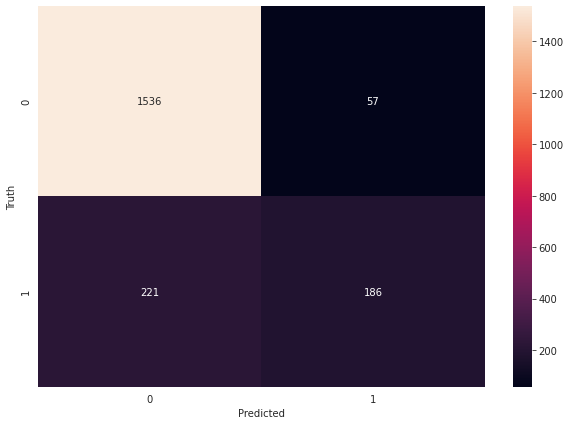

In [63]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [65]:
y_pred = []
for element in y_pred:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [66]:
y_pred[:10]

[]

In [67]:
y_test[:10]

5337    1
8732    0
3359    0
5580    0
3485    1
2608    0
5334    0
5953    0
3939    0
6463    0
Name: Exited, dtype: int64

# Method 1: Undersampling

In [68]:
# Class count
count_class_0, count_class_1 = df1.Exited.value_counts()

# Divide by class
df_class_0 = df1[df1['Exited'] == 0]
df_class_1 = df1[df1['Exited'] == 1]

In [69]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Exited.value_counts())

Random under-sampling:
1    2037
0    2037
Name: Exited, dtype: int64


In [70]:
X = df_test_under.drop('Exited',axis='columns')
y = df_test_under['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [71]:
y_train.value_counts()

1    1630
0    1629
Name: Exited, dtype: int64

In [72]:
y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
102/102 [==============================] - 1s 1ms/step - loss: 0.6763 - accuracy: 0.5882
Epoch 2/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6516 - accuracy: 0.6401
Epoch 3/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6337 - accuracy: 0.6542
Epoch 4/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6171 - accuracy: 0.6683
Epoch 5/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6037 - accuracy: 0.6757
Epoch 6/100
102/102 [==============================] - 0s 1ms/step - loss: 0.5913 - accuracy: 0.6849
Epoch 7/100
102/102 [==============================] - 0s 1ms/step - loss: 0.5820 - accuracy: 0.6971
Epoch 8/100
102/102 [==============================] - 0s 1ms/step - loss: 0.5721 - accuracy: 0.7033
Epoch 9/100
102/102 [==============================] - 0s 1ms/step - loss: 0.5660 - accuracy: 0.7088
Epoch 10/100
102/102 [==============================] - 0s 1ms/step - loss: 0.5576 - accura

Text(69.0, 0.5, 'Truth')

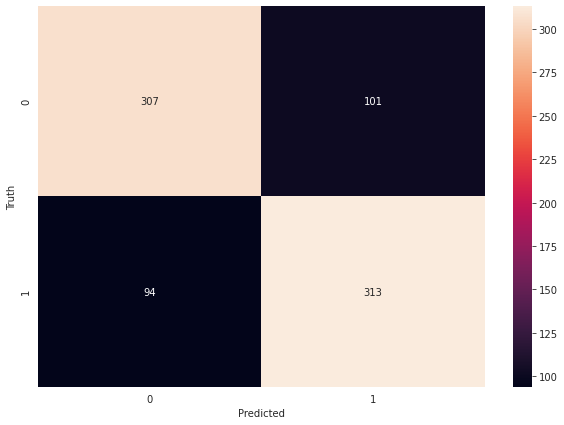

In [73]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred1)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Method2: Oversampling

In [74]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Exited.value_counts())

Random over-sampling:
1    7963
0    7963
Name: Exited, dtype: int64


In [75]:
X = df_test_over.drop('Exited',axis='columns')
y = df_test_over['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [76]:
y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
399/399 [==============================] - 1s 1ms/step - loss: 0.6543 - accuracy: 0.6178
Epoch 2/100
399/399 [==============================] - 1s 1ms/step - loss: 0.6108 - accuracy: 0.6666
Epoch 3/100
399/399 [==============================] - 0s 1ms/step - loss: 0.5896 - accuracy: 0.6870
Epoch 4/100
399/399 [==============================] - 1s 1ms/step - loss: 0.5757 - accuracy: 0.6998
Epoch 5/100
399/399 [==============================] - 1s 1ms/step - loss: 0.5615 - accuracy: 0.7107
Epoch 6/100
399/399 [==============================] - 0s 1ms/step - loss: 0.5445 - accuracy: 0.7234
Epoch 7/100
399/399 [==============================] - 1s 1ms/step - loss: 0.5271 - accuracy: 0.7392
Epoch 8/100
399/399 [==============================] - 1s 1ms/step - loss: 0.5122 - accuracy: 0.7458
Epoch 9/100
399/399 [==============================] - 1s 1ms/step - loss: 0.4996 - accuracy: 0.7515
Epoch 10/100
399/399 [==============================] - 0s 1ms/step - loss: 0.4900 - accura

Text(69.0, 0.5, 'Truth')

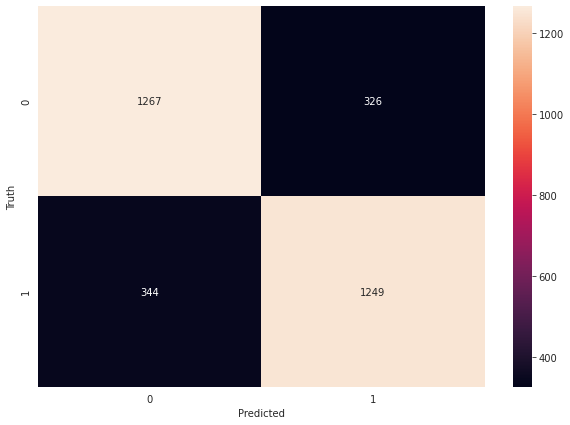

In [77]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred2)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#Method3: SMOTE

In [78]:
X = df1.drop('Exited',axis='columns')
y = df1['Exited']

In [79]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [81]:
y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
399/399 [==============================] - 1s 1ms/step - loss: 0.6491 - accuracy: 0.6239
Epoch 2/100
399/399 [==============================] - 0s 1ms/step - loss: 0.6074 - accuracy: 0.6694
Epoch 3/100
399/399 [==============================] - 1s 1ms/step - loss: 0.5771 - accuracy: 0.6986
Epoch 4/100
399/399 [==============================] - 1s 1ms/step - loss: 0.5517 - accuracy: 0.7206
Epoch 5/100
399/399 [==============================] - 1s 1ms/step - loss: 0.5334 - accuracy: 0.7344
Epoch 6/100
399/399 [==============================] - 0s 1ms/step - loss: 0.5199 - accuracy: 0.7443
Epoch 7/100
399/399 [==============================] - 1s 1ms/step - loss: 0.5078 - accuracy: 0.7519
Epoch 8/100
399/399 [==============================] - 0s 1ms/step - loss: 0.4981 - accuracy: 0.7571
Epoch 9/100
399/399 [==============================] - 1s 1ms/step - loss: 0.4903 - accuracy: 0.7619
Epoch 10/100
399/399 [==============================] - 0s 1ms/step - loss: 0.4840 - accura

Text(69.0, 0.5, 'Truth')

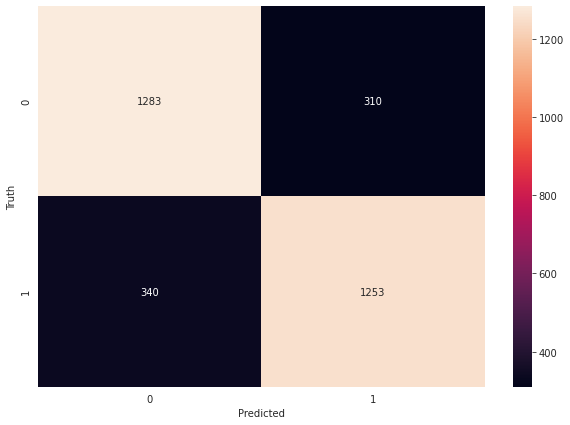

In [82]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred3)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Method4: Use of Ensemble with undersampling

In [83]:
df1.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [84]:
X = df1.drop('Exited',axis='columns')
y = df1['Exited']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [86]:
y_train.value_counts()

0    6370
1    1630
Name: Exited, dtype: int64

In [87]:
df2 = X_train.copy()
df2['Exited'] = y_train

In [88]:
df2.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Exited
5710,0.856,1,0.216216,0.5,0.554265,0.333333,0,0,0.339721,1,0,0,0
3745,0.852,0,0.256757,0.1,0.371163,0.333333,1,1,0.980432,0,1,0,0
5429,0.664,0,0.405405,0.7,0.000000,0.333333,1,0,0.325318,1,0,0,0
551,0.648,1,0.391892,0.6,0.426077,0.000000,1,1,0.010339,0,1,0,1
8967,0.970,1,0.094595,0.7,0.000000,0.333333,1,1,0.417230,1,0,0,0


In [89]:
df2_class0 = df2[df2.Exited==0]
df2_class1 = df2[df2.Exited==1]

In [90]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Exited', axis='columns')
    y_train = df_train.Exited
    return X_train, y_train

In [91]:
X_train, y_train = get_train_batch(df2_class0, df2_class1, 0, 1630)

y_pred4_1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
102/102 [==============================] - 1s 1ms/step - loss: 0.7258 - accuracy: 0.5402
Epoch 2/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6601 - accuracy: 0.6347
Epoch 3/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6384 - accuracy: 0.6632
Epoch 4/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6238 - accuracy: 0.6724
Epoch 5/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6142 - accuracy: 0.6804
Epoch 6/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6068 - accuracy: 0.6847
Epoch 7/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6019 - accuracy: 0.6899
Epoch 8/100
102/102 [==============================] - 0s 1ms/step - loss: 0.5968 - accuracy: 0.6877
Epoch 9/100
102/102 [==============================] - 0s 1ms/step - loss: 0.5927 - accuracy: 0.6883
Epoch 10/100
102/102 [==============================] - 0s 1ms/step - loss: 0.5887 - accura

In [92]:
X_train, y_train = get_train_batch(df2_class0, df2_class1, 1630,3260 )

y_pred4_2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
102/102 [==============================] - 1s 1ms/step - loss: 0.6927 - accuracy: 0.4988
Epoch 2/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6743 - accuracy: 0.5788
Epoch 3/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6583 - accuracy: 0.6239
Epoch 4/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6417 - accuracy: 0.6521
Epoch 5/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6262 - accuracy: 0.6604
Epoch 6/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6156 - accuracy: 0.6752
Epoch 7/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6049 - accuracy: 0.6840
Epoch 8/100
102/102 [==============================] - 0s 1ms/step - loss: 0.5949 - accuracy: 0.6868
Epoch 9/100
102/102 [==============================] - 0s 1ms/step - loss: 0.5830 - accuracy: 0.7015
Epoch 10/100
102/102 [==============================] - 0s 1ms/step - loss: 0.5705 - accura

In [93]:
X_train, y_train = get_train_batch(df2_class0, df2_class1, 3260, 4890)

y_pred4_3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
102/102 [==============================] - 1s 1ms/step - loss: 0.7051 - accuracy: 0.5227
Epoch 2/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6663 - accuracy: 0.6086
Epoch 3/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6352 - accuracy: 0.6580
Epoch 4/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6131 - accuracy: 0.6752
Epoch 5/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6003 - accuracy: 0.6893
Epoch 6/100
102/102 [==============================] - 0s 1ms/step - loss: 0.5921 - accuracy: 0.6899
Epoch 7/100
102/102 [==============================] - 0s 1ms/step - loss: 0.5852 - accuracy: 0.6948
Epoch 8/100
102/102 [==============================] - 0s 1ms/step - loss: 0.5794 - accuracy: 0.7049
Epoch 9/100
102/102 [==============================] - 0s 1ms/step - loss: 0.5747 - accuracy: 0.7071
Epoch 10/100
102/102 [==============================] - 0s 1ms/step - loss: 0.5685 - accura

In [94]:
X_train, y_train = get_train_batch(df2_class0, df2_class1, 4890, 6370)

y_pred4_4 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
98/98 [==============================] - 1s 1ms/step - loss: 0.6845 - accuracy: 0.5704
Epoch 2/100
98/98 [==============================] - 0s 1ms/step - loss: 0.6640 - accuracy: 0.6219
Epoch 3/100
98/98 [==============================] - 0s 1ms/step - loss: 0.6439 - accuracy: 0.6354
Epoch 4/100
98/98 [==============================] - 0s 1ms/step - loss: 0.6260 - accuracy: 0.6514
Epoch 5/100
98/98 [==============================] - 0s 1ms/step - loss: 0.6121 - accuracy: 0.6659
Epoch 6/100
98/98 [==============================] - 0s 1ms/step - loss: 0.6007 - accuracy: 0.6904
Epoch 7/100
98/98 [==============================] - 0s 1ms/step - loss: 0.5880 - accuracy: 0.7003
Epoch 8/100
98/98 [==============================] - 0s 1ms/step - loss: 0.5767 - accuracy: 0.7058
Epoch 9/100
98/98 [==============================] - 0s 1ms/step - loss: 0.5669 - accuracy: 0.7116
Epoch 10/100
98/98 [==============================] - 0s 1ms/step - loss: 0.5568 - accuracy: 0.7225
Epoch 11/

In [95]:
y_pred_final = y_pred4_1.copy()
for i in range(len(y_pred4_1)):
    n_ones = y_pred4_1[i] + y_pred4_2[i] + y_pred4_3[i]+y_pred4_4[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [96]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.93      0.75      0.83      1593
           1       0.44      0.77      0.56       407

    accuracy                           0.76      2000
   macro avg       0.69      0.76      0.70      2000
weighted avg       0.83      0.76      0.78      2000



Text(69.0, 0.5, 'Truth')

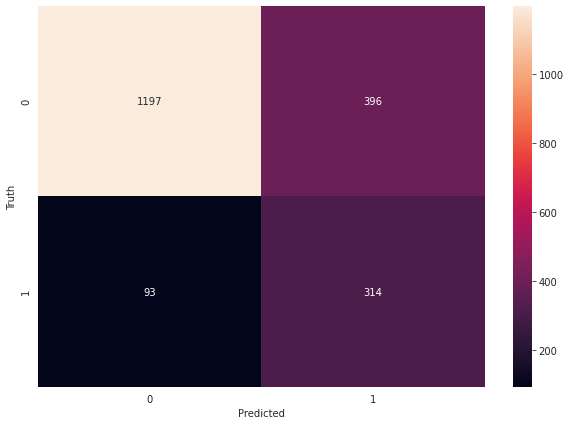

In [97]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_final)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')